In [2]:
import pandas as pd 
from prophet import Prophet
from matplotlib import pyplot as plt 
plt.figure(figsize = (10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [3]:
data = pd.read_feather('tavbase/GS.feather')
data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Profit,Shipping Cost,Order Priority,Year,Month,Period,Order Date Month,Delivery,Price,Benefit
0,MX-2014-143658,2014-10-02,2014-10-06,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,Mexico,...,4.56,1.033,Medium,2014,10,46,2014-10-01,4,4.36,1
1,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,...,90.72,13.449,Medium,2012,10,22,2012-10-01,5,31.52,1
2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,...,54.08,9.627,Medium,2012,10,22,2012-10-01,5,96.64,1
3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,...,4.96,1.371,Medium,2012,10,22,2012-10-01,5,8.86,1
4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,Colombia,...,11.44,3.787,Medium,2012,10,22,2012-10-01,5,35.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,HU-2012-7730,2012-09-05,2012-09-07,First Class,NF-8385,Natalie Fritzler,Consumer,Budapest,Budapest,Hungary,...,3.42,1.980,High,2012,9,21,2012-09-01,2,11.07,1
51286,HU-2012-7730,2012-09-05,2012-09-07,First Class,NF-8385,Natalie Fritzler,Consumer,Budapest,Budapest,Hungary,...,18.42,13.020,High,2012,9,21,2012-09-01,2,30.72,1
51287,HU-2012-7730,2012-09-05,2012-09-07,First Class,NF-8385,Natalie Fritzler,Consumer,Budapest,Budapest,Hungary,...,20.88,8.780,High,2012,9,21,2012-09-01,2,20.13,1
51288,HU-2012-7730,2012-09-05,2012-09-07,First Class,NF-8385,Natalie Fritzler,Consumer,Budapest,Budapest,Hungary,...,33.84,18.970,High,2012,9,21,2012-09-01,2,32.61,1


23:22:16 - cmdstanpy - INFO - Chain [1] start processing


LATAM


23:22:17 - cmdstanpy - INFO - Chain [1] done processing


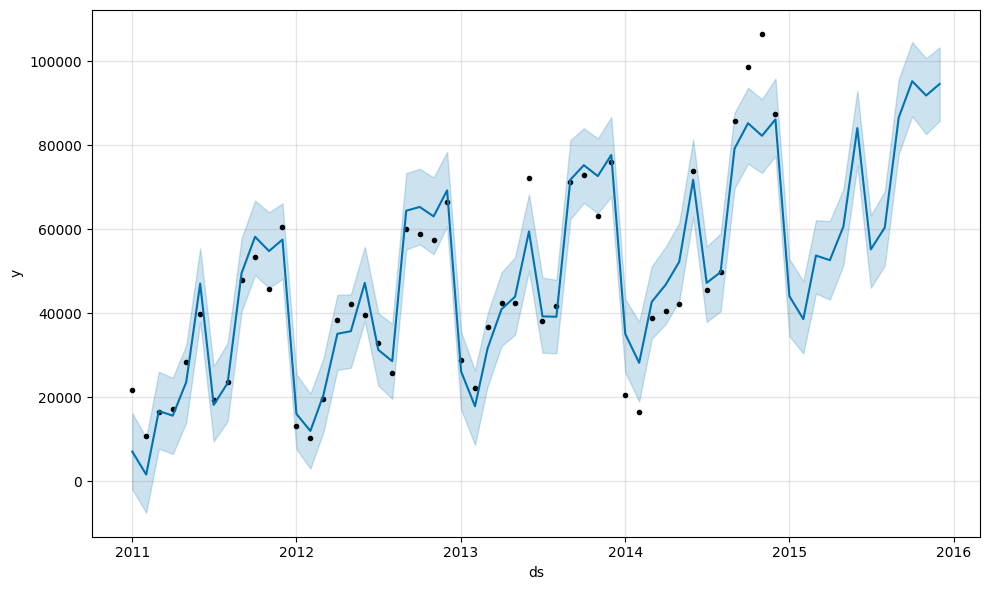

/tmp/ipykernel_3252/3231799672.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:17 - cmdstanpy - INFO - Chain [1] start processing
23:22:18 - cmdstanpy - INFO - Chain [1] done processing


EU


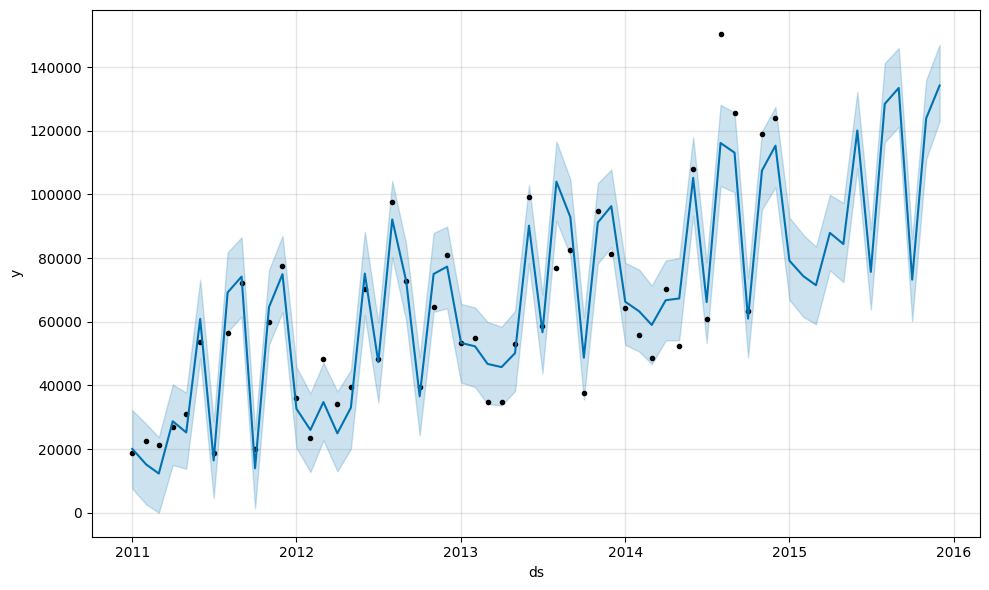

/tmp/ipykernel_3252/3231799672.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:18 - cmdstanpy - INFO - Chain [1] start processing


APAC


23:22:19 - cmdstanpy - INFO - Chain [1] done processing


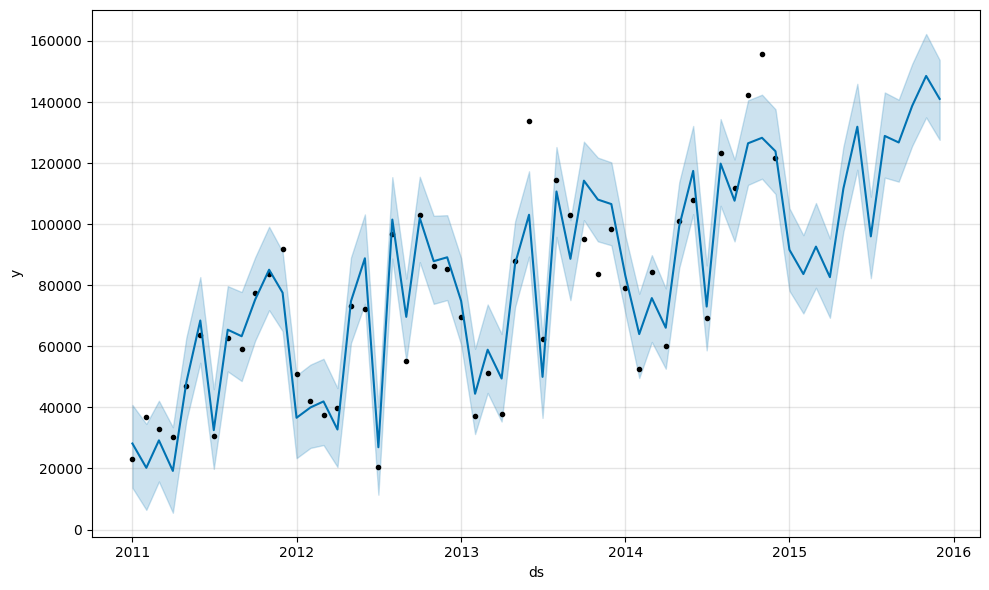

/tmp/ipykernel_3252/3231799672.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:19 - cmdstanpy - INFO - Chain [1] start processing


US


23:22:20 - cmdstanpy - INFO - Chain [1] done processing


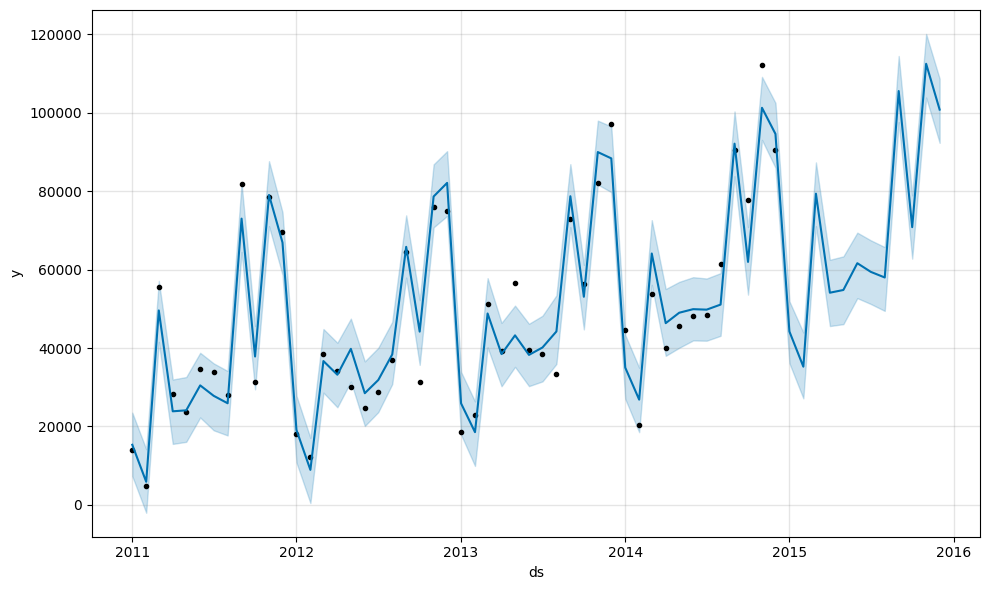

/tmp/ipykernel_3252/3231799672.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:20 - cmdstanpy - INFO - Chain [1] start processing


Africa


23:22:21 - cmdstanpy - INFO - Chain [1] done processing


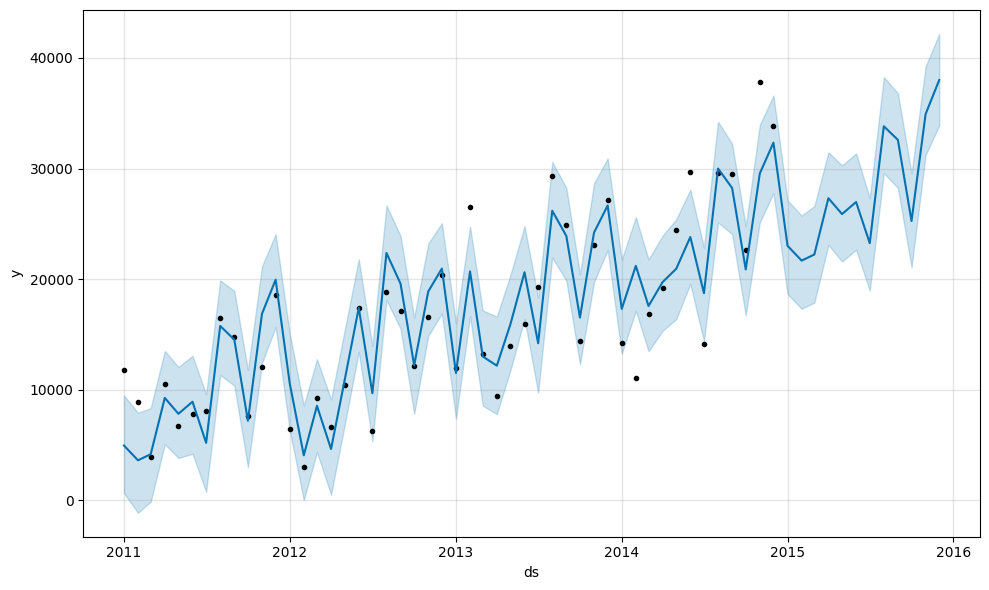

/tmp/ipykernel_3252/3231799672.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:21 - cmdstanpy - INFO - Chain [1] start processing


EMEA


23:22:22 - cmdstanpy - INFO - Chain [1] done processing


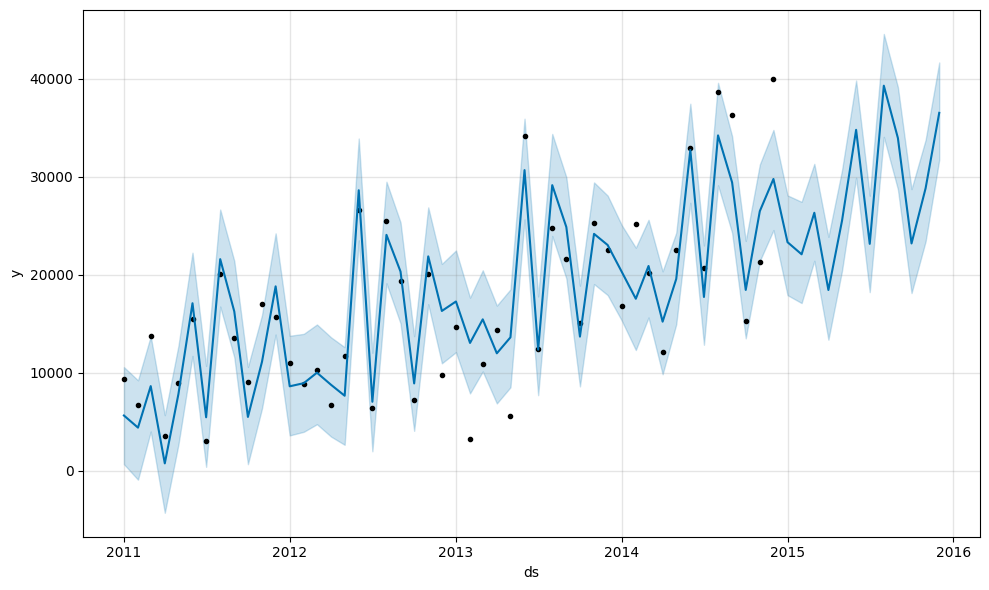

/tmp/ipykernel_3252/3231799672.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:22 - cmdstanpy - INFO - Chain [1] start processing


Canada


23:22:23 - cmdstanpy - INFO - Chain [1] done processing


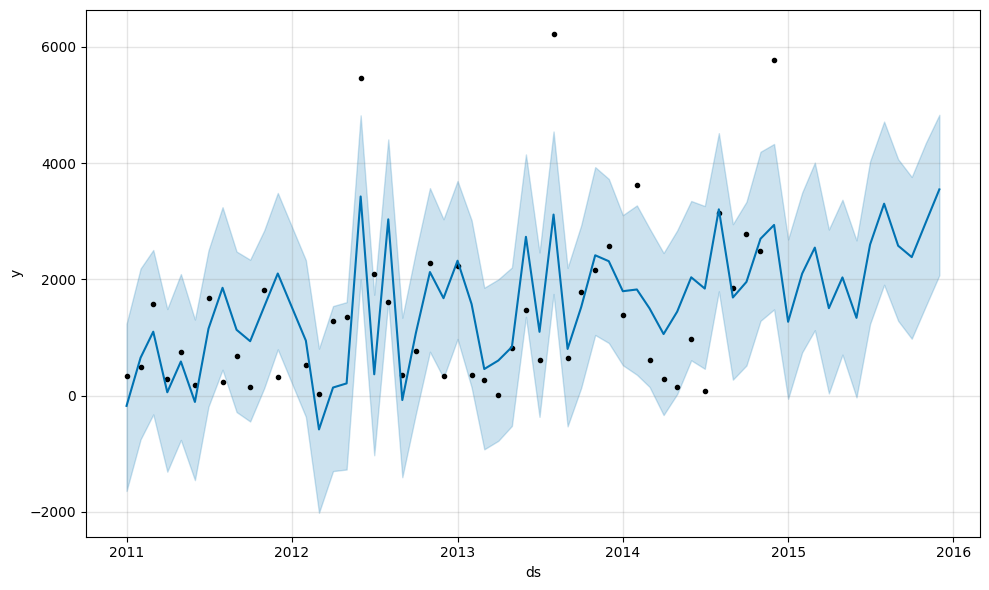

/tmp/ipykernel_3252/3231799672.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(


In [15]:
## Aula 10 - Regreção (com sazonalidades)
regressao_market = pd.DataFrame()
for market in data['Market'].unique():
    print(market)
    regressao = data[data['Market'] == market][
        ['Order Date Month', 'Sales']
    ].groupby('Order Date Month')['Sales'].sum().reset_index()
    regressao = regressao.rename(columns = {
        'Order Date Month': 'ds', 'Sales': 'y'
    })
    m = Prophet().fit(regressao)
    future = m.make_future_dataframe(periods = 12, freq = 'MS')
    forecast = m.predict(future)
    forecast['Market'] = market
    fig1 = m.plot(forecast)
    plt.show()
    regressao_market = regressao_market.append(
        forecast[['Market', 'ds', 'yhat', 'yhat_lower', 'yhat_upper']],
        ignore_index = True
    )
    regressao_market

In [16]:
regressao_market.to_feather('tavbase/regressao_mercado.feather')

23:25:50 - cmdstanpy - INFO - Chain [1] start processing


North


23:25:50 - cmdstanpy - INFO - Chain [1] done processing


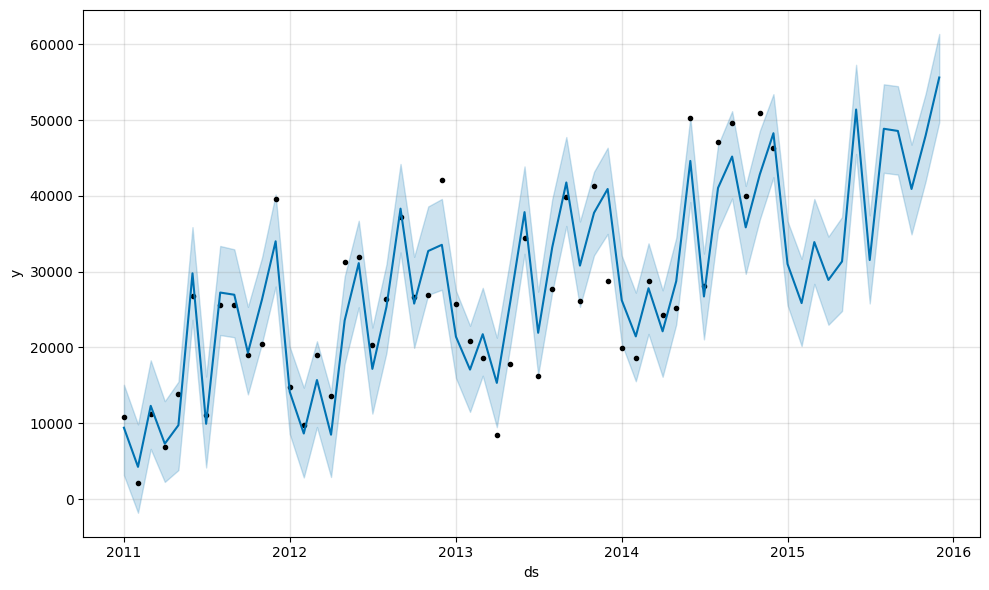

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:25:51 - cmdstanpy - INFO - Chain [1] start processing


South


23:25:51 - cmdstanpy - INFO - Chain [1] done processing


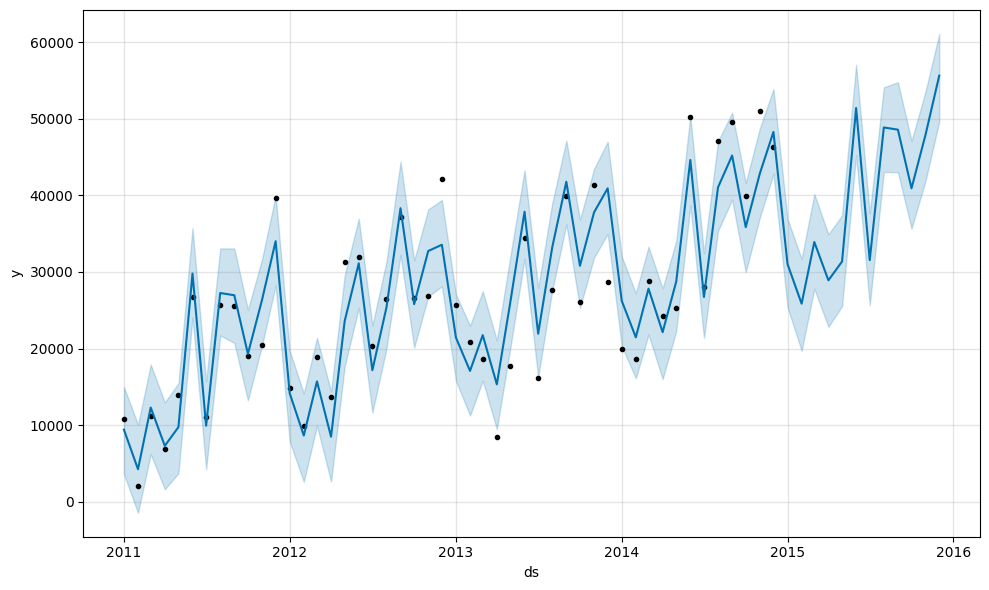

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:25:52 - cmdstanpy - INFO - Chain [1] start processing


Central


23:25:52 - cmdstanpy - INFO - Chain [1] done processing


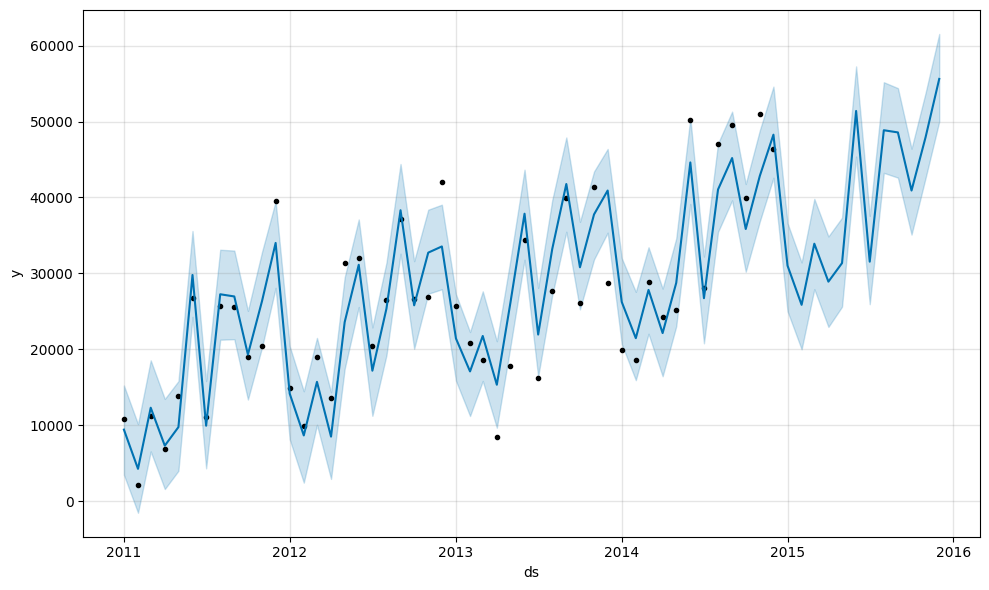

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:25:53 - cmdstanpy - INFO - Chain [1] start processing


Caribbean


23:25:54 - cmdstanpy - INFO - Chain [1] done processing


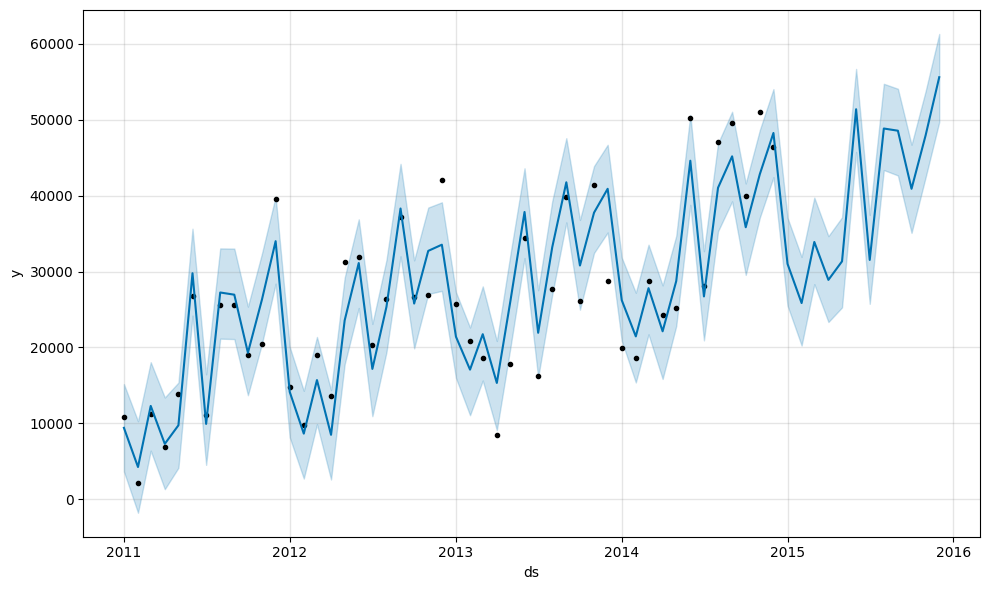

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:25:54 - cmdstanpy - INFO - Chain [1] start processing


North Asia


23:25:55 - cmdstanpy - INFO - Chain [1] done processing


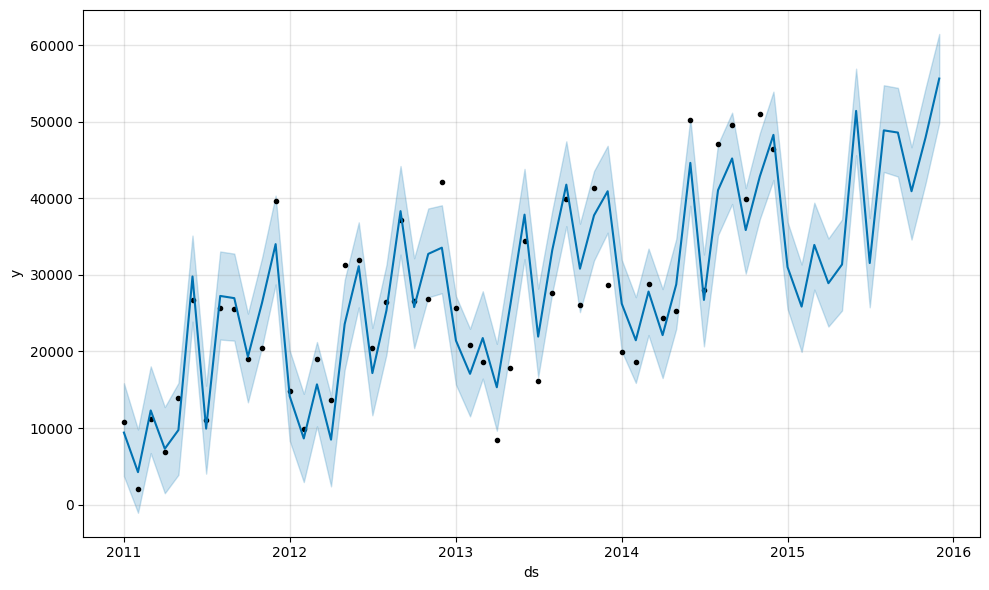

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:25:55 - cmdstanpy - INFO - Chain [1] start processing


Southeast Asia


23:25:56 - cmdstanpy - INFO - Chain [1] done processing


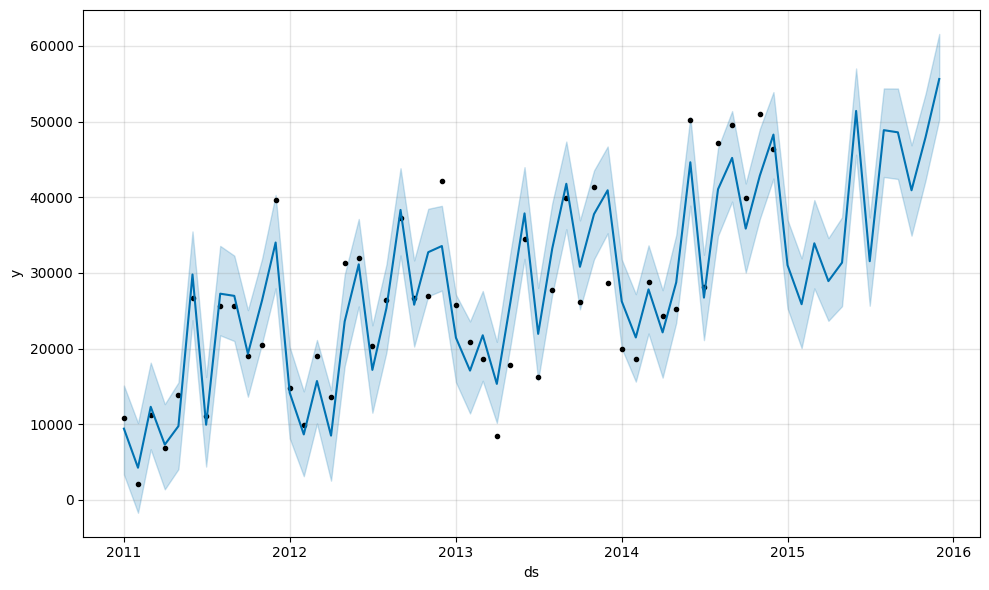

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:25:57 - cmdstanpy - INFO - Chain [1] start processing


Central Asia


23:25:57 - cmdstanpy - INFO - Chain [1] done processing


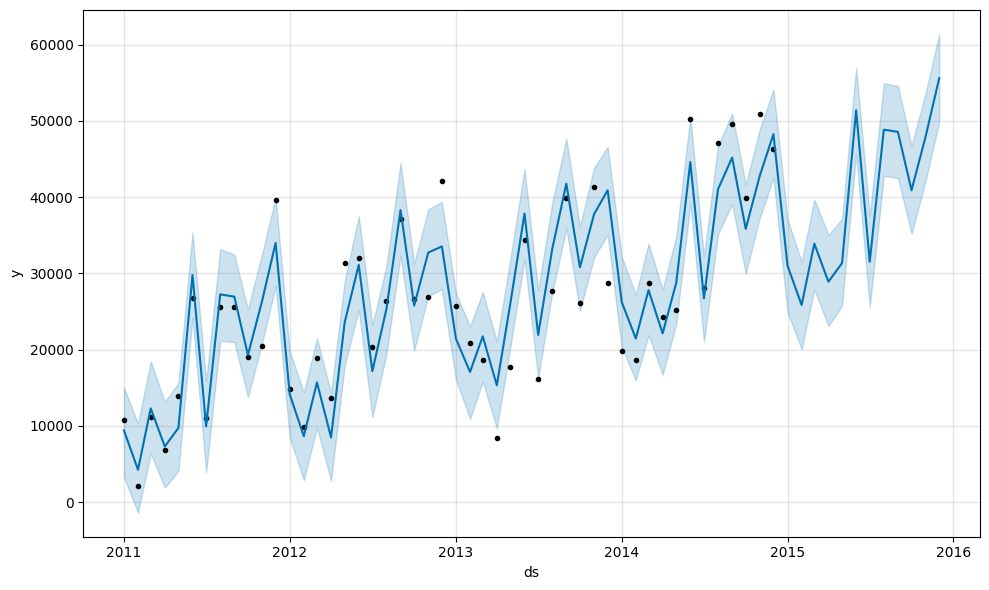

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:25:58 - cmdstanpy - INFO - Chain [1] start processing


Oceania


23:25:58 - cmdstanpy - INFO - Chain [1] done processing


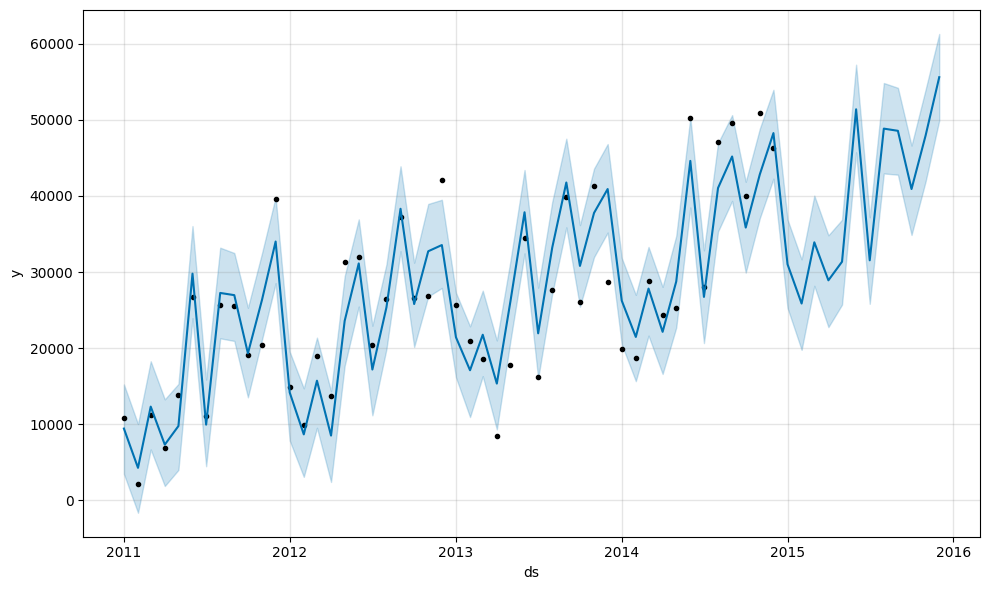

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:25:59 - cmdstanpy - INFO - Chain [1] start processing


West


23:25:59 - cmdstanpy - INFO - Chain [1] done processing


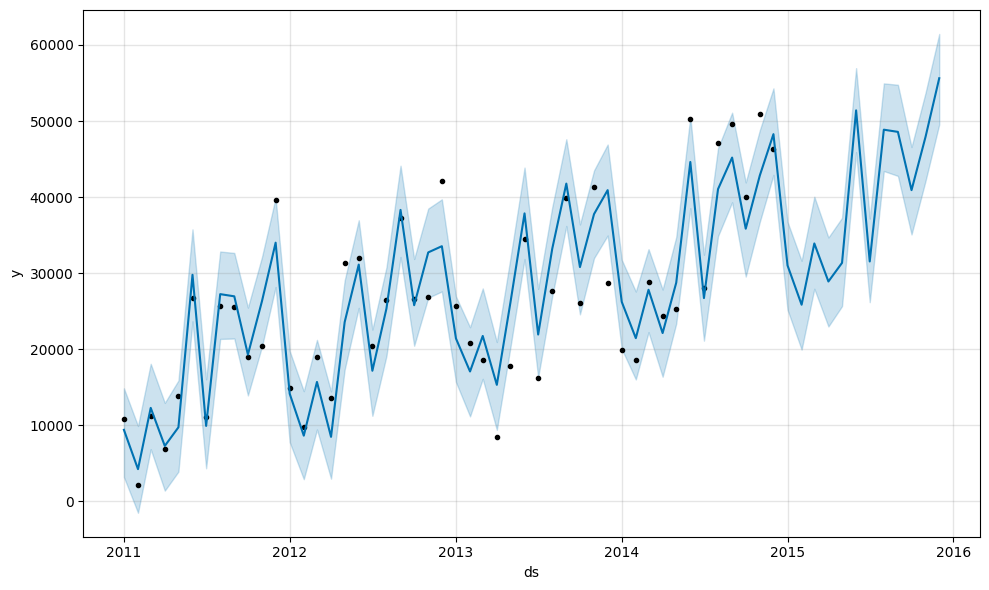

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:26:00 - cmdstanpy - INFO - Chain [1] start processing


East


23:26:00 - cmdstanpy - INFO - Chain [1] done processing


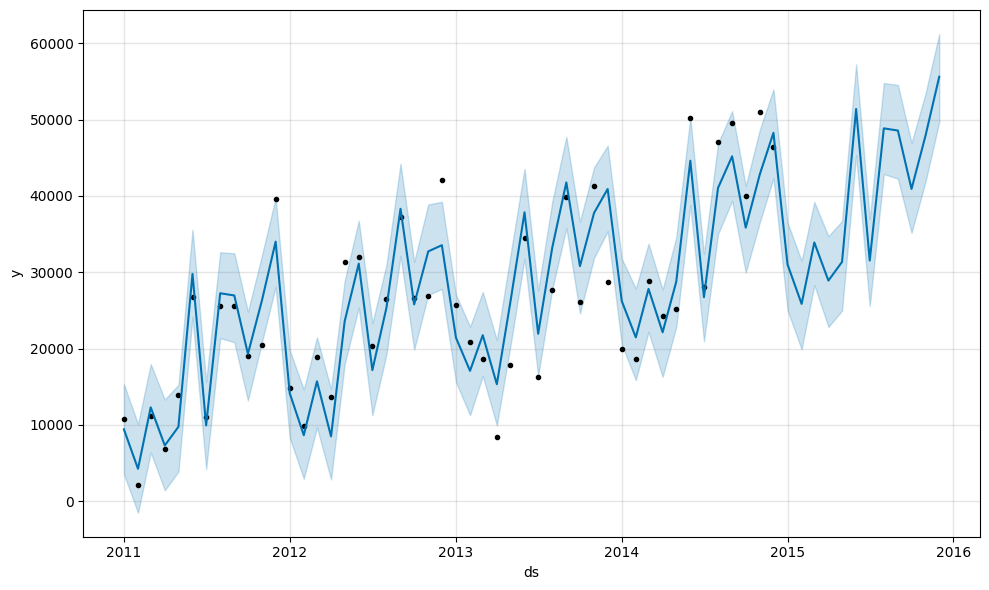

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:26:01 - cmdstanpy - INFO - Chain [1] start processing


Africa


23:26:01 - cmdstanpy - INFO - Chain [1] done processing


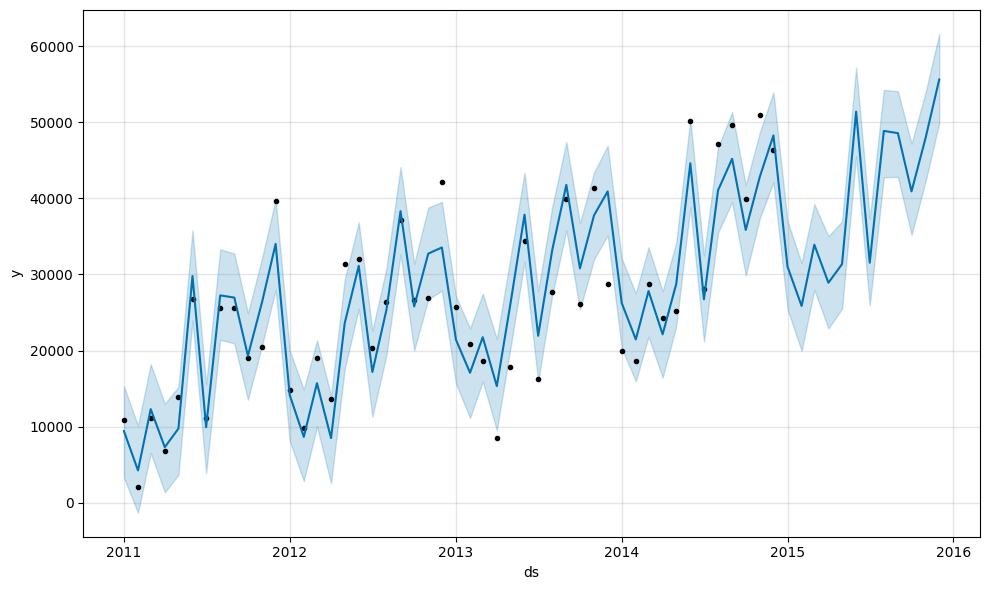

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:26:02 - cmdstanpy - INFO - Chain [1] start processing


EMEA


23:26:03 - cmdstanpy - INFO - Chain [1] done processing


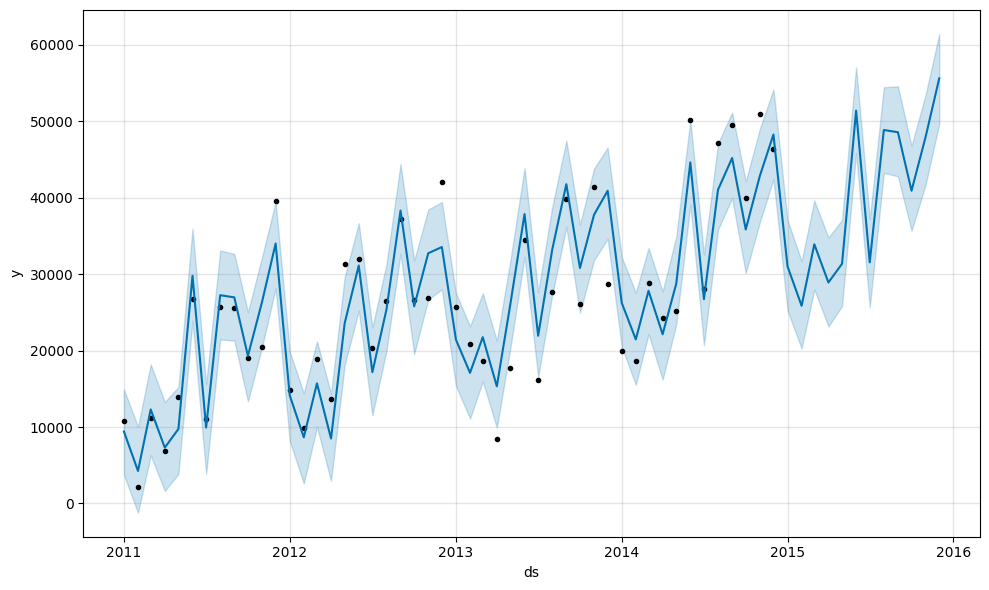

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(
23:26:03 - cmdstanpy - INFO - Chain [1] start processing


Canada


23:26:04 - cmdstanpy - INFO - Chain [1] done processing


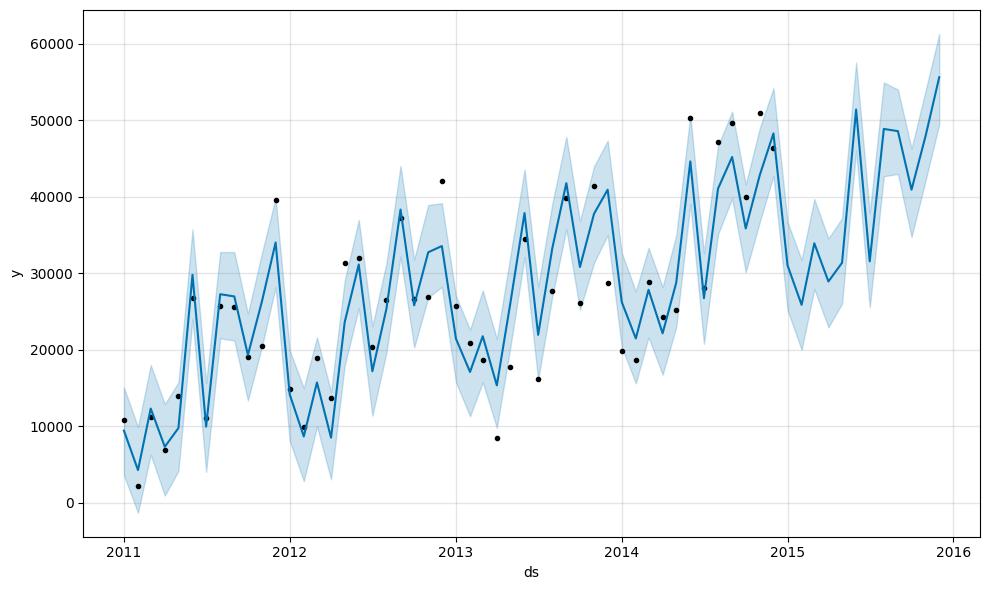

/tmp/ipykernel_3252/1504144485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_market.append(


In [20]:
regressao_region = pd.DataFrame()
for region in data['Region'].unique():
    print(region)
    regressao = data[data['Region'] == market][
        ['Order Date Month', 'Sales']
    ].groupby('Order Date Month')['Sales'].sum().reset_index()
    regressao = regressao.rename(columns = {
        'Order Date Month': 'ds', 'Sales': 'y'
    })
    m = Prophet().fit(regressao)
    future = m.make_future_dataframe(periods = 12, freq = 'MS')
    forecast = m.predict(future)
    forecast['Region'] = market
    fig1 = m.plot(forecast)
    plt.show()
    regressao_region = regressao_market.append(
        forecast[['Region', 'ds', 'yhat', 'yhat_lower', 'yhat_upper']],
        ignore_index = True
    )
    regressao_region

In [ ]:
regressao_region.to_feather('tavbase/regressao_regiao.feather')